# Практика 7: Создание и использование генеративных противоречивых примеров (GANbased Adversarial Examples)

Выполнил: Беляев Степан Константинович

## Шаг 1: Концепция генеративных противоречивых примеров

Генеративные противоречивые примеры — это изображения, созданные генеративными моделями,
которые могут обманывать модели классификации. В отличие от стандартных атак (например, FGSM
или PGD), где добавляются малые шумы, GAN могут генерировать реалистичные, но сложные для
распознавания модели изображения, которые сложно отличить от настоящих данных

# Шаг 2: Создание простой GAN для генерации противоречивых примеров

Cоздадим генеративную состязательную сеть (GAN), состоящую из двух частей: генератора и
дискриминатора. Генератор будет создавать изображения, а дискриминатор — пытаться распознать
поддельные изображения.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)
# Генератор:
def build_generator():
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, activation='relu', input_dim=100))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(784, activation='tanh'))
  model.add(layers.Reshape((28, 28, 1)))
  return model

# Дискриминатор:
def build_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
  model.add(layers.LeakyReLU())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

# Создание моделей:
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора:
discriminator.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

# Создание GAN:
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN:
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
  half_batch = batch_size // 2
  for epoch in range(epochs):
  # Обучение дискриминатора:
      idx = np.random.randint(0, train_images.shape[0], half_batch)
      real_images = train_images[idx]
      noise = np.random.normal(0, 1, (half_batch, 100))
      fake_images = generator.predict(noise)
      real_labels = np.ones((half_batch, 1))
      fake_labels = np.zeros((half_batch, 1))
      d_loss_real = discriminator.train_on_batch(real_images, real_labels)
      d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
  # Обучение генератора через дискриминатор:
      noise = np.random.normal(0, 1, (batch_size, 100))
      valid_labels = np.ones((batch_size, 1))
      g_loss = gan.train_on_batch(noise, valid_labels)
      if epoch % 100 == 0:
        print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN:
train_gan(generator, discriminator, gan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


0 [D loss: [0.7308692 0.2421875]] [G loss: [array(0.70285785, dtype=float32), array(0.70285785, dtype=float32), array(0.484375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━

## Шаг 3: Генерация противоречивых примеров с помощью GAN
 Cгенерируем противоречивые примеры, используя обученный генератор GAN.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


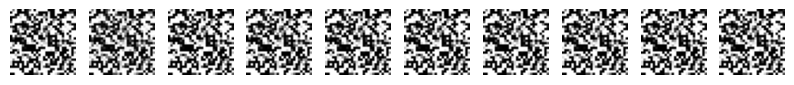

In [3]:
# Генерация противоречивых примеров
def generate_adversarial_examples(generator, n_samples):
 noise = np.random.normal(0, 1, (n_samples, 100))
 generated_images = generator.predict(noise)
 return generated_images
# Генерация 100 примеров
adversarial_images = generate_adversarial_examples(generator, 100)
# Визуализация противоречивых примеров
plt.figure(figsize=(10, 10))
for i in range(10):
 plt.subplot(1, 10, i+1)
 plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')
 plt.axis('off')
plt.show()

## Шаг 4: Оценка моделей на противоречивых примерах

Проверим, как обученные модели (полносвязная сеть и CNN) справляются с
противоречивыми примерами, созданными с помощью GAN.

In [6]:
# Загрузка обученных моделей:
model1 = tf.keras.models.load_model('mnist_model1.h5')
model2 = tf.keras.models.load_model('mnist_model2.h5')
# Оценка первой модели на противоречивых примерах:
adv_images_reshaped = adversarial_images.reshape(-1, 28, 28, 1)
loss1, acc1 = model1.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Accuracy of mnist_model_fully_connected on adversarial GAN examples: {acc1}')
# Оценка второй модели на противоречивых примерах:
loss2, acc2 = model2.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Accuracy of mnist_model_сonvolutional on adversarial GAN examples: {acc2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 310.5208  
Accuracy of mnist_model_fully_connected on adversarial GAN examples: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 427.4238  
Accuracy of mnist_model_сonvolutional on adversarial GAN examples: 0.0


## Шаг 5: Анализ результатов

Оба классификатора показали нулевую точность при тестировании на противоречивых примерах, что свидетельствует о их полной уязвимости к атакам, использующим генеративные состязательные сети (GAN). Для повышения устойчивости моделей к подобным атакам необходимо внедрить защитные методы, включая обучение с использованием противоречивых примеров (Adversarial Training), а также применять методы регуляризации и оптимизацию архитектуры.